### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [6]:
# Checks for missing values in each column
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [7]:
value = data['car'].value_counts()
value

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
# Creates a copy of the original dataset
data_cleaned = data.copy()

In [9]:
# Fills missing values in 'car' column with a new category 'Unknown'
data_cleaned['car'].fillna('Unknown', inplace=True)

In [10]:
data_cleaned = data_cleaned.dropna()

In [11]:
print("Missing Values After Cleaning:")
print(data_cleaned.isnull().sum())

Missing Values After Cleaning:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


In [26]:
data_cleaned['coupon'].value_counts()

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

In [12]:
# Verifies the changes
print(data_cleaned['car'].value_counts())

car
Unknown                                     11971
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [13]:
Obv = data_cleaned['Y'].value_counts()
Obv

Y
1    6877
0    5202
Name: count, dtype: int64

In [29]:
# Counts the number of observations where the coupon was accepted
accepted_count = (data_cleaned['Y'].sum())
accepted_count

6877

In [15]:
# Calculates the total number of observations
Total = len(data_cleaned)
Total

12079

In [16]:
# Calculates the proportion of observations that chose to accept the coupon
proportion_accepted = accepted_count / Total
proportion_accepted

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

In [18]:
coupon_counts = data_cleaned['coupon'].value_counts()
coupon_counts

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

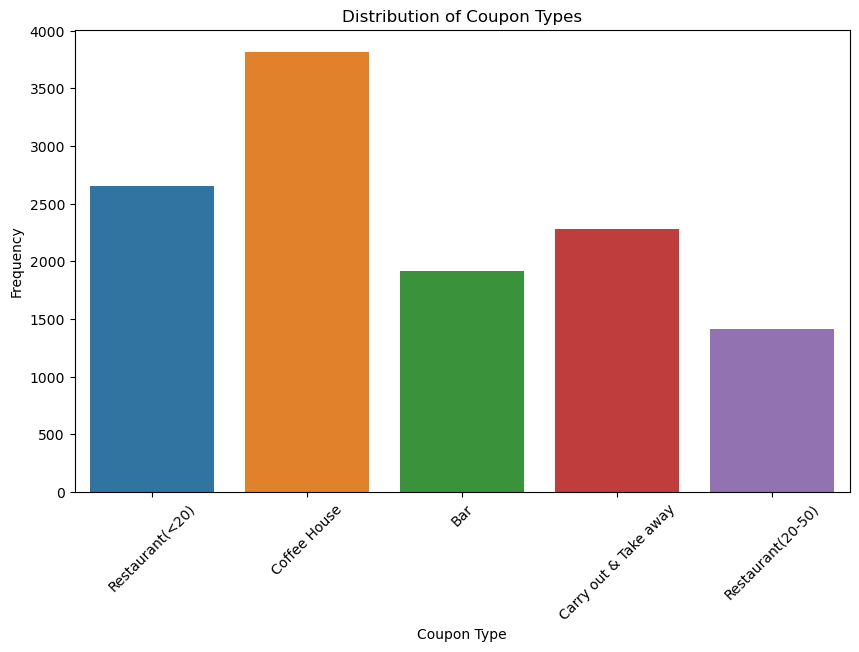

In [299]:
# Plots the distribution of coupon types
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='coupon')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

In [22]:
data_cleaned['temperature'].value_counts()

temperature
80    6222
55    3662
30    2195
Name: count, dtype: int64

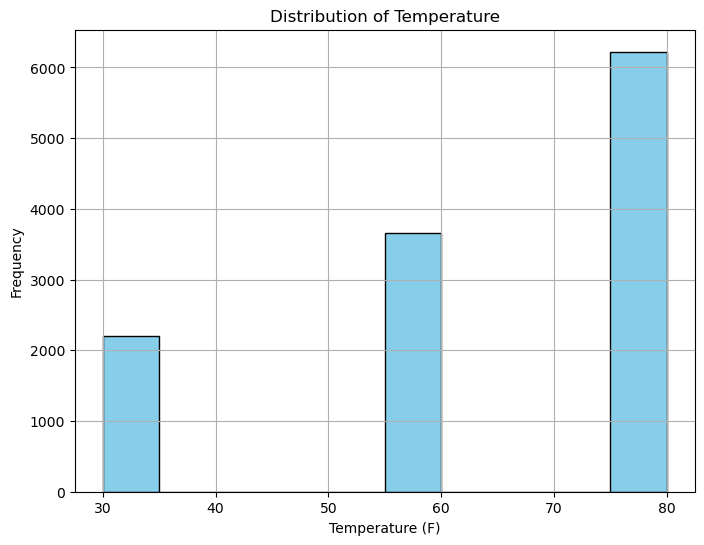

In [21]:
# Plots the distribution of temperatures
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned['temperature'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [300]:
# Filters the original DataFrame for bar-related coupons
bar_coupons_df = data_cleaned[data_cleaned['coupon'].str.contains('Bar', case=False)]

bar_coupons_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [301]:
bar_coupons_df['Y'].value_counts()

Y
0    1125
1     788
Name: count, dtype: int64

In [302]:
# Counts the number of observations where the coupon was accepted
bar_accepted_count = (bar_coupons_df['Y'].sum())
bar_accepted_count

788

In [303]:
# Calculates the total number of observations
bar_total = len(bar_coupons_df)
bar_total

1913

In [32]:
# Calculates the proportion of bar coupons that were accepted
bar_proportion_accepted = bar_accepted_count / bar_total
bar_proportion_accepted

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [36]:
bar_coupons_df['Bar'].value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [48]:
# Drivers who went to a bar 3 or fewer times a month
bar_few_times = bar_coupons_df[bar_coupons_df['Bar'].isin(['never', 'less1', '1~3'])]

In [39]:
# Drivers who went to a bar more than 3 times a month
bar_more_times = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])]

In [41]:
# Acceptance rate for users who went to a bar 3 or fewer times a month
acceptance_rate_few_times = bar_few_times['Y'].mean()
acceptance_rate_few_times

0.37267441860465117

In [44]:
# Acceptance rate for users who went to a bar more than 3 times a month
acceptance_rate_more_times = bar_more_times['Y'].mean()
acceptance_rate_more_times

0.7616580310880829

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [46]:
bar_coupons_df['age'].value_counts()

age
21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: count, dtype: int64

In [150]:
# Drivers who go to a bar more than once a month and are over the age of 25
bar_group1 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
                             (bar_coupons_df['age'] != 'below21') & 
                             (bar_coupons_df['age'] != '21')]

In [105]:
# All other drivers
bar_group1_all_other = bar_coupons_df[(bar_coupons_df['Bar'].isin(['0', 'less1'])) |
                                   (bar_coupons_df['age'] == 'below21') |
                                   (bar_coupons_df['age'] == '21')]

In [151]:
# Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25
acceptance_rate_bar_group1 = bar_group1['Y'].mean()
acceptance_rate_bar_group1

0.6898263027295285

In [152]:
# Acceptance rate for all other drivers
acceptance_rate_group1_all_other = bar_group1_all_other['Y'].mean()
acceptance_rate_group1_all_other

0.4524590163934426

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [113]:
# Drivers who go to a bar more than once a month, had passengers that were not kids, and had occupations other than farming, fishing, or forestry
bar_group3 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
                        (bar_coupons_df['passanger'] != 'kid(s)') & 
                        (~bar_coupons_df['occupation'].isin(['farming, fishing, or forestry']))]

In [114]:
# All other drivers
bar_group3_all_other = bar_coupons_df[(bar_coupons_df['Bar'].isin(['0', 'less1'])) | 
                        (bar_coupons_df['passanger'] == 'kid(s)') | 
                        (bar_coupons_df['occupation'] == 'farming, fishing, or forestry')]

In [115]:
# Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and had occupations other than farming, fishing, or forestry
acceptance_rate_bar_group3 = bar_group3['Y'].mean()
acceptance_rate_bar_group3

0.6853146853146853

In [118]:
# Acceptance rate for all other drivers
acceptance_rate_group3_all_other = bar_group3_all_other['Y'].mean()
acceptance_rate_group3_all_other

0.44665461121157324

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [119]:
# Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar_group4 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
                      (bar_coupons_df['passanger'] != 'kid(s)') & 
                      (~bar_coupons_df['maritalStatus'].isin(['widowed']))]

In [121]:
# Drivers who go to bars more than once a month and are under the age of 30
bar_group5 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
                        (bar_coupons_df['age'] == 'below21') |
                        (bar_coupons_df['age'] == '21') |
                        (bar_coupons_df['age'] == '26')]


In [93]:
bar_coupons_df['income'].value_counts()

income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

In [125]:
# Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
bar_group6 = bar_coupons_df[(bar_coupons_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
                        (bar_coupons_df['income'] == 'Less than $12500') |
                        (bar_coupons_df['income'] == '$25000 - $37499') |
                        (bar_coupons_df['income'] == '$12500 - $24999') |
                        (bar_coupons_df['income'] == '$37500 - $49999')]

In [120]:
# Acceptance rate for group 4
acceptance_rate_group4 = bar_group4['Y'].mean()
acceptance_rate_group4

0.6853146853146853

In [127]:
# Acceptance rate for group 5
acceptance_rate_group5 = bar_group5['Y'].mean()
acceptance_rate_group5

0.4941935483870968

In [126]:
# Acceptance rate for group 6
acceptance_rate_group6 = bar_group6['Y'].mean()
acceptance_rate_group6

0.4175084175084175

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Based on the analysis, drivers who accepted bar coupons tended to be younger, visited bars more frequently, had passengers who were not children, and often had occupations other than farming, fishing, or forestry. 
# They also showed a preference for visiting cheap restaurants more frequently.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [74]:
data_cleaned['coupon'].value_counts()

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

In [304]:
# Filters the original DataFrame for carry out-related coupons
carryout_coupons_df = data_cleaned[data_cleaned['coupon'].str.contains('Carry out & Take away', case=False)]

carryout_coupons_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1


In [166]:
carryout_coupons_df['Y'].value_counts()

Y
1    1682
0     598
Name: count, dtype: int64

In [167]:
# Counts the number of observations where the coupon was accepted
carryout_accepted_count = (carryout_coupons_df['Y'].sum())
carryout_accepted_count

1682

In [168]:
# Calculates the total number of observations
carryout_total = len(carryout_coupons_df)
carryout_total

2280

In [169]:
# Proportion of carry out coupons that were accepted
carryout_proportion_accepted = carryout_accepted_count / carryout_total
carryout_proportion_accepted

0.737719298245614

In [171]:
carryout_coupons_df['CarryAway'].value_counts()

CarryAway
1~3      830
4~8      783
less1    343
gt8      296
never     28
Name: count, dtype: int64

In [172]:
# Drivers who get carry out 3 or fewer times a month
carryout_few_times = carryout_coupons_df[carryout_coupons_df['CarryAway'].isin(['never', 'less1', '1~3'])]

In [173]:
# Drivers who get carry out more than 3 times a month
carryout_more_times = carryout_coupons_df[carryout_coupons_df['CarryAway'].isin(['4~8', 'gt8'])]

In [174]:
# Acceptance rate for drivers who get carry out 3 or fewer times a month
acceptance_rate_carryout_few_times = carryout_few_times['Y'].mean()
acceptance_rate_carryout_few_times


0.723563696919234

In [175]:
# Acceptance rate for drivers who get carry out more than 3 times a month
acceptance_rate_carryout_more_times = carryout_more_times['Y'].mean()
acceptance_rate_carryout_more_times

0.7534754402224282

In [330]:
# Drivers who get carry out more than three times a month and are under the age of 30
carryout_group1 = carryout_coupons_df[(carryout_coupons_df['CarryAway'].isin(['4~8', 'gt8'])) &
                        (carryout_coupons_df['age'] == 'below21') |
                        (carryout_coupons_df['age'] == '21') |
                        (carryout_coupons_df['age'] == '26')]


In [331]:
# Acceptance rate for group 1
acceptance_rate_carryout_group1 = carryout_group1['Y'].mean()
acceptance_rate_carryout_group1

0.740701381509033

In [332]:
# Drivers who get carry out less than three times a month and are over the age of 30
carryout_group2 = carryout_coupons_df[(carryout_coupons_df['CarryAway'].isin(['never', 'less1', '1~3'])) &
                        (carryout_coupons_df['age'] != 'below21') |
                        (carryout_coupons_df['age'] != '21') |
                        (carryout_coupons_df['age'] != '26')]

In [329]:
# Acceptance rate for group 2
acceptance_rate_carryout_group2 = carryout_group2['Y'].mean()
acceptance_rate_carryout_group2

0.737719298245614

In [347]:
# Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
carryout_group3 = carryout_coupons_df[(carryout_coupons_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
                        (carryout_coupons_df['income'] == 'Less than $12500') |
                        (carryout_coupons_df['income'] == '$25000 - $37499') |
                        (carryout_coupons_df['income'] == '$12500 - $24999') |
                        (carryout_coupons_df['income'] == '$37500 - $49999')]

In [348]:
# Acceptance rate for group 3
acceptance_rate_carryout_group3 = carryout_group3['Y'].mean()
acceptance_rate_carryout_group3

0.7577413479052824

In [296]:
# Counts the total number of coupons for each passenger type
passenger_counts = carryout_coupons_df['passanger'].value_counts()
passenger_counts

passanger
Alone        1339
Friend(s)     707
Kid(s)        142
Partner        92
Name: count, dtype: int64

In [204]:
# Counts the number of accepted coupons for each passenger type
passenger_accepted_counts = carryout_coupons_df[carryout_coupons_df['Y'] == 1]['passanger'].value_counts()

In [333]:
# Calculates the proportion of accepted coupons for each passenger type
passenger_proportions = passenger_accepted_counts / passenger_counts
passenger_proportions

passanger
Alone        0.731889
Friend(s)    0.759547
Kid(s)       0.697183
Partner      0.717391
Name: count, dtype: float64

In [206]:
# Converts the proportions Series to a DataFrame for easier plotting
passenger_proportions_df = passenger_proportions.reset_index()
passenger_proportions_df.columns = ['Passenger Type', 'Proportion Accepted']

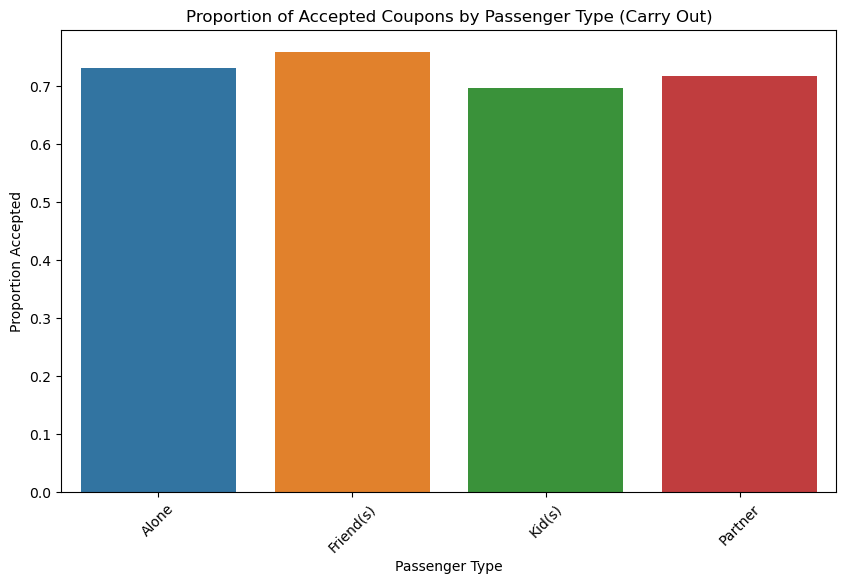

In [208]:
# Plots the proportion of accepted coupons for each passenger type
plt.figure(figsize=(10, 6))
sns.barplot(x='Passenger Type', y='Proportion Accepted', data=passenger_proportions_df)
plt.title('Proportion of Accepted Coupons by Passenger Type (Carry Out)')
plt.xlabel('Passenger Type')
plt.ylabel('Proportion Accepted')
plt.xticks(rotation=45)
plt.show()

In [241]:
carryout_coupons_df['destination'].value_counts()

destination
No Urgent Place    931
Work               729
Home               620
Name: count, dtype: int64

In [248]:
# Filters for coupons with destination "home" and "not urgent place"
filtered_carryout_home_df = carryout_coupons_df[(carryout_coupons_df['destination'] == 'Home') | (carryout_coupons_df['destination'] == 'No Urgent Place')]

In [249]:
# Counts the total number of coupons with destination "home" and "not urgent place"
total_filtered_coupons2 = len(filtered_carryout_home_df)

In [250]:
# Counts the number of accepted coupons with destination "home" and "not urgent place"
accepted_filtered_coupons2 = filtered_carryout_home_df[filtered_carryout_home_df['Y'] == 1]

In [251]:
# Calculates the proportion of accepted coupons
proportion_accepted2 = len(accepted_filtered_coupons2) / total_filtered_coupons2
proportion_accepted2

0.7736943907156673

In [273]:
# Groups by destination and calculate total coupons and accepted coupons for each destination
destination_grouped = carryout_coupons_df.groupby('destination')['Y'].agg(['count', 'sum'])

In [274]:
# Resets index to make 'destination' a column again
destination_grouped.reset_index(inplace=True)

In [285]:
# Calculates the proportion of accepted coupons for each destination
destination_grouped['proportion_accepted'] = destination_grouped['sum'] / destination_grouped['count']
destination_grouped

,destination,count,sum,proportion_accepted
0,Home,620,491,0.791935
1,No Urgent Place,931,709,0.761547
2,Work,729,482,0.661180


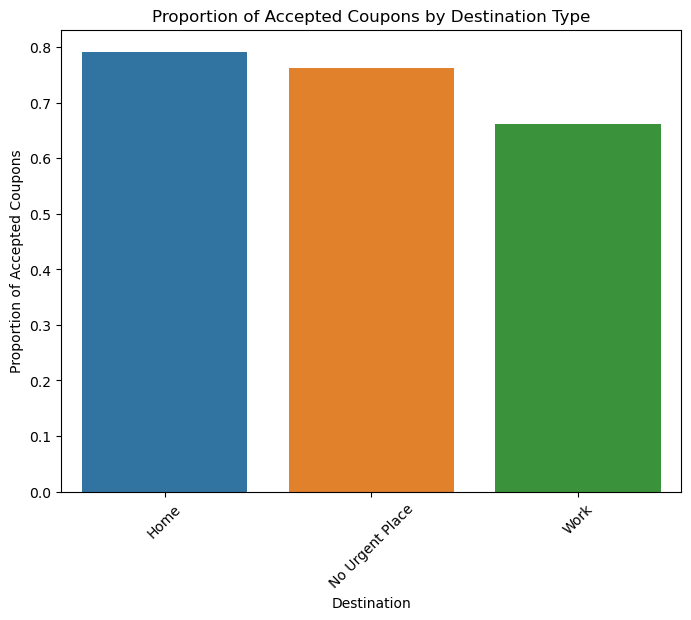

In [295]:
# Plots the proportion of accepted coupons for each destination type
plt.figure(figsize=(8, 6))
sns.barplot(x='destination', y='proportion_accepted', data=destination_grouped)
plt.title('Proportion of Accepted Coupons by Destination Type')
plt.xlabel('Destination')
plt.ylabel('Proportion of Accepted Coupons')
plt.xticks(rotation=45)
plt.show()

In [279]:
carryout_coupons_df['time'].value_counts()

time
7AM     729
10AM    490
10PM    439
6PM     413
2PM     209
Name: count, dtype: int64

In [290]:
# Groups the data by the time and calculate the total and accepted carryout coupons
time_grouped_carryout = carryout_coupons_df.groupby('time')['Y'].agg(['count', 'sum'])

In [291]:
# Calculates the proportion of accepted carryout coupons for each time
time_grouped_carryout['proportion_accepted'] = time_grouped_carryout['sum'] / time_grouped_carryout['count']
time_grouped_carryout

,count,sum,proportion_accepted
time,,,
10AM,490,343,0.700000
10PM,439,337,0.767654
2PM,209,181,0.866029
6PM,413,339,0.820823
7AM,729,482,0.661180


In [293]:
# Resets index to make 'time' a column again
time_grouped_carryout.reset_index(inplace=True)

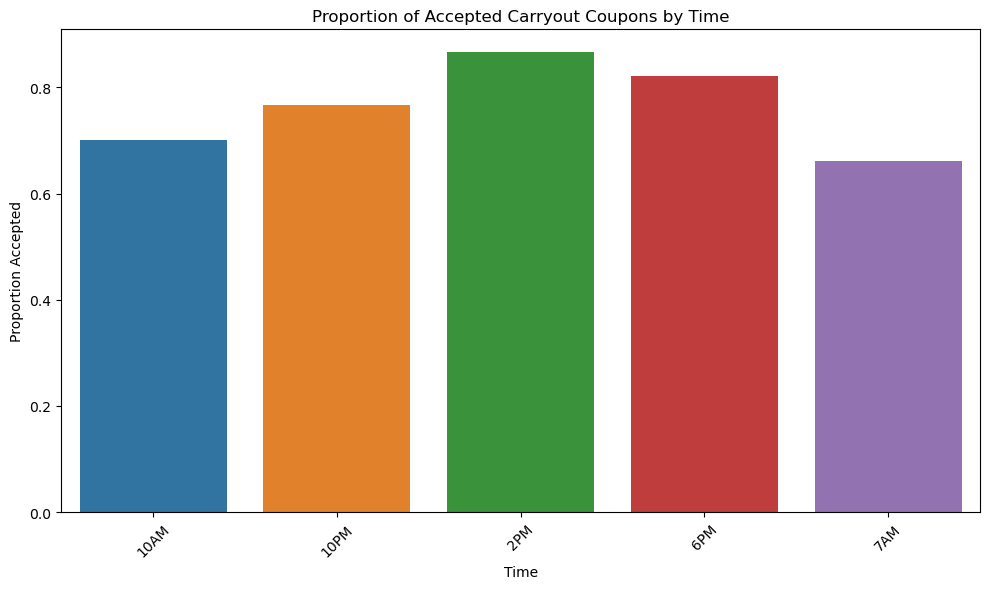

In [294]:
# Plots the proportion of accepted carryout coupons by time
plt.figure(figsize=(10, 6))
sns.barplot(data=time_grouped_carryout, x='time', y='proportion_accepted')
plt.title('Proportion of Accepted Carryout Coupons by Time')
plt.xlabel('Time')
plt.ylabel('Proportion Accepted')
plt.xticks(rotation=45)
plt.show()

In [305]:
data_cleaned['coupon'].value_counts()

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

In [306]:
# Groups the DataFrame by the 'coupon' column and calculate the sum of 'Y' (accepted coupons) for each group
final_accepted_coupons = data_cleaned.groupby('coupon')['Y'].sum()

In [307]:
# Calculates the total number of coupons issued for each coupon type
final_total_coupons = data_cleaned['coupon'].value_counts()

In [309]:
# Calculates the acceptance rate for each coupon type
final_acceptance_rate = final_accepted_coupons / final_total_coupons
final_acceptance_rate

coupon
Bar                      0.411918
Carry out & Take away    0.737719
Coffee House             0.496331
Restaurant(20-50)        0.446013
Restaurant(<20)          0.709009
dtype: float64